In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df = df.drop("Outcome",axis=1) 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
print(df.describe()) 

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000        

In [6]:
from sklearn.preprocessing import scale 

In [7]:
X = pd.DataFrame(scale(df)) 
print(X.head(n=10)) 

          0         1         2         3         4         5         6  \
0  0.639947  0.848324  0.149641  0.907270 -0.692891  0.204013  0.468492   
1 -0.844885 -1.123396 -0.160546  0.530902 -0.692891 -0.684422 -0.365061   
2  1.233880  1.943724 -0.263941 -1.288212 -0.692891 -1.103255  0.604397   
3 -0.844885 -0.998208 -0.160546  0.154533  0.123302 -0.494043 -0.920763   
4 -1.141852  0.504055 -1.504687  0.907270  0.765836  1.409746  5.484909   
5  0.342981 -0.153185  0.253036 -1.288212 -0.692891 -0.811341 -0.818079   
6 -0.250952 -1.342476 -0.987710  0.719086  0.071204 -0.125977 -0.676133   
7  1.827813 -0.184482 -3.572597 -1.288212 -0.692891  0.419775 -1.020427   
8 -0.547919  2.381884  0.046245  1.534551  4.021922 -0.189437 -0.947944   
9  1.233880  0.128489  1.390387 -1.288212 -0.692891 -4.060474 -0.724455   

          7  
0  1.425995  
1 -0.190672  
2 -0.105584  
3 -1.041549  
4 -0.020496  
5 -0.275760  
6 -0.616111  
7 -0.360847  
8  1.681259  
9  1.766346  


In [8]:
from sklearn.cluster import KMeans 


In [9]:
clustering = KMeans(n_clusters=3, random_state=12) 
clustering.fit(X) 

KMeans(n_clusters=3, random_state=12)

In [10]:
clustering

KMeans(n_clusters=3, random_state=12)

In [11]:
print(clustering.cluster_centers_)

[[-0.35819002  0.55983946  0.22359726  0.89652484  0.97458723  0.62331635
   0.38707461 -0.22179196]
 [-0.46067918 -0.54843901 -0.41228464 -0.33221423 -0.37997137 -0.44368966
  -0.21923475 -0.59010462]
 [ 1.08194386  0.2972029   0.42159496 -0.37996824 -0.38353716  0.06924224
  -0.04523723  1.14777824]]


In [12]:
print(clustering.n_iter_)

13


In [13]:
print(clustering.labels_)

[2 1 2 1 0 1 1 1 0 2 1 2 2 0 2 1 0 1 1 0 0 2 2 2 2 2 2 1 2 2 2 0 1 1 2 0 2
 2 1 0 0 2 2 2 2 0 1 1 2 1 1 1 1 2 0 1 0 0 0 0 1 2 1 0 2 1 0 2 1 0 1 0 2 0
 1 1 2 1 1 1 1 1 2 1 2 0 2 1 2 1 1 0 2 2 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0
 0 1 1 0 2 2 1 1 1 0 1 1 2 1 0 0 1 0 2 0 2 0 2 1 1 1 1 1 0 2 2 1 2 0 1 2 0
 2 1 0 1 2 0 2 0 1 1 1 2 2 2 0 1 1 2 1 1 1 1 2 0 1 0 1 0 2 0 2 2 1 1 1 1 2
 2 0 0 0 0 1 2 2 2 2 0 1 1 0 0 1 1 1 1 2 1 2 2 1 2 1 0 2 0 2 0 0 0 1 2 0 2
 1 2 1 1 1 0 0 0 1 0 1 1 1 2 2 0 2 1 1 1 1 0 0 2 2 0 0 1 2 1 1 1 2 1 1 1 0
 2 0 1 1 2 1 2 1 0 1 1 2 1 1 1 2 0 1 1 2 1 1 2 2 2 2 2 0 0 1 0 1 0 0 0 2 0
 0 0 2 2 1 0 1 2 1 0 2 1 0 0 1 0 1 1 2 1 1 1 0 2 1 1 1 2 1 1 0 2 0 2 2 1 1
 2 1 0 1 2 0 2 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 2 0 2 2 0 0 2 2 2 0 1 1 1 1 0
 0 1 1 1 0 2 1 1 2 0 1 1 1 1 1 1 2 2 2 1 0 2 0 1 2 0 1 1 1 0 1 2 0 2 2 0 2
 1 2 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 2 1 1 2 0 1 1 2
 1 0 1 0 1 1 1 1 0 2 1 2 2 1 0 2 2 1 2 1 2 1 1 0 1 0 0 1 1 2 1 2 0 1 2 2 0
 0 1 1 1 0 0 0 1 2 1 1 1 

In [14]:
sum_of_squared_distances = [] 
K = range(1,20) 
for k in K: 
    km = KMeans(n_clusters=k, random_state=12) 
    km = km.fit(X) 
    sum_of_squared_distances.append(km.inertia_) 
    

In [16]:
sum_of_squared_distances

[6143.999999999994,
 5128.841512614158,
 4359.937398574243,
 3918.9522674958857,
 3625.743466542054,
 3361.1548729764368,
 3139.1614250735533,
 3001.6825953441,
 2876.629228303966,
 2766.692164839358,
 2666.735653172098,
 2571.8495699764735,
 2499.1639316490996,
 2402.306245869712,
 2325.0492100073902,
 2273.670388270657,
 2235.3980509903877,
 2194.1243327050033,
 2162.667720514332]

In [20]:
from sklearn.metrics import davies_bouldin_score, silhouette_score


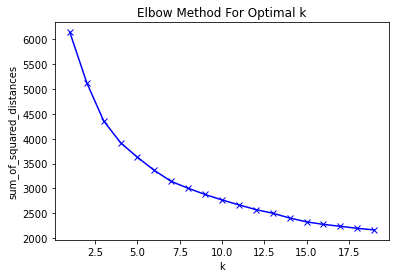

In [17]:
plt.plot(K, sum_of_squared_distances, 'bx-') 
plt.xlabel('k') 
plt.ylabel('sum_of_squared_distances') 
plt.title('Elbow Method For Optimal k') 
plt.show() 

In [22]:
dbval = davies_bouldin_score(X, clustering.labels_) 
sscore = silhouette_score(X, clustering.labels_) 
print(dbval) 
print(sscore) 

1.6830494194043766
0.1795431040908445


In [28]:
dbvals = [] 
sscores = [] 
for cls in range(9): 
    clustering = KMeans(n_clusters=cls+2,random_state=12) 
    clustering.fit(X) 
    dbval = davies_bouldin_score(X, clustering.labels_) 
    sscore = silhouette_score(X, clustering.labels_) 
    dbvals.append(dbval) 
    sscores.append(sscore) 

In [29]:
range(9) 

range(0, 9)

In [30]:
df = pd.DataFrame({'No cluster': range(2,11), 'DB-Index': dbvals, 'silhouette score': sscores}) 
print(df) 

   No cluster  DB-Index  silhouette score
0           2  2.005574          0.194507
1           3  1.683049          0.179543
2           4  1.494899          0.201749
3           5  1.626217          0.188273
4           6  1.631093          0.167942
5           7  1.548150          0.168976
6           8  1.546654          0.153810
7           9  1.530663          0.165881
8          10  1.568422          0.155320


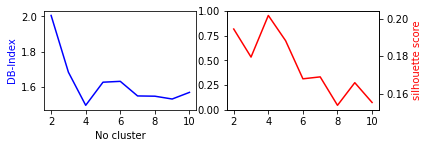

In [36]:
fig = plt.figure() 
axl = fig.add_subplot(221) 
axl.plot(df['No cluster'], df['DB-Index'], 'b-') 


axl.set_ylabel('DB-Index',color = 'b') 
axl.set_xlabel('No cluster', color = 'black') 

axl= fig.add_subplot(222) 
#fig = plt.figure() 
ax2 = axl.twinx() 
ax2.plot(df['No cluster'], df['silhouette score'], 'r-') 
ax2.set_ylabel('silhouette score', color='r') 
plt.show() 

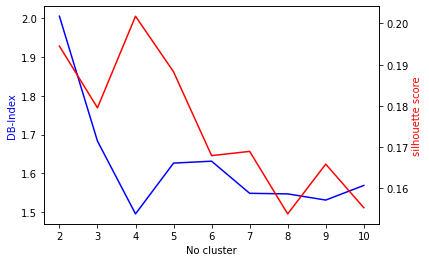

In [40]:
fig = plt.figure() 
axl = fig.add_subplot(111) 
axl.plot(df['No cluster'], df['DB-Index'], 'b-') 


axl.set_ylabel('DB-Index',color = 'b') 
axl.set_xlabel('No cluster', color = 'black') 


#fig = plt.figure() 
ax2 = axl.twinx() 
ax2.plot(df['No cluster'], df['silhouette score'], 'r-') 
ax2.set_ylabel('silhouette score', color='r') 
plt.show() 